## Machine Learning Certification Training using Python

Case Study

Domain – Banking/Loan
focus – Lower NPA (Non Performing Asset)
Business challenge/requirement
PeerLoanKart is an NBFC (Non-Banking Financial Company) which facilitates peer to peer loan.
It connects people who need money (borrowers) with people who have money (investors). As an investor, you would want to invest in people who showed a profile of having a high probability of paying you back.
You as a ML expert create a model that will help predict whether a borrower will pay the loan or not.
Key issues
Ensure NPAs are lower – meaning PeerLoanKart wants to be very diligent in giving loans to borrower
Considerations
NONE
Data volume
- Approx 9578 records – file loan_borowwer_data.csv
Fields in Data
• credit.policy: 1 if the customer meets the credit underwriting criteria of PeerLoanKart, and 0 otherwise
• purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other")
• int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by PeerLoanKart to be more risky are assigned higher interest rates
• installment: The monthly installments owed by the borrower if the loan is funded
• log.annual.inc: The natural log of the self-reported annual income of the borrower
• dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income)
• fico: The FICO credit score of the borrower
• days.with.cr.line: The number of days the borrower has had a credit line
• revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)
• revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available)
• inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months
• delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years
• pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)
• not.fully.paid: This is the output field. Please note that 1 means borrower is not going to pay the loan completely
Additional information
- NA
Business benefits
Increase in profits up to 20% as NPA will be reduced due to loan disbursal for only good borrowers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfloanborrower = pd.read_csv('loan_borowwer_data.csv')

In [3]:
dfloanborrower.shape

(9578, 14)

In [25]:
dfloanborrower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [27]:
from sklearn.preprocessing import LabelEncoder

In [29]:
labelEncoder = LabelEncoder()

In [31]:
dfloanborrower['purpose'] = labelEncoder.fit_transform(dfloanborrower['purpose'].astype('str'))

In [34]:
dfloanborrower['purpose'].unique()

array([2, 1, 0, 4, 6, 5, 3], dtype=int64)

In [35]:
dfloanborrower.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.686881,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [36]:
dfloanborrower.sample(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
5977,1,4,0.0740,62.12,10.691945,4.53,787,4770.000000,706,1.4,1,0,0,0
7002,1,1,0.1218,33.30,10.404263,13.56,692,2130.000000,13781,65.8,3,0,0,0
603,1,4,0.0863,28.47,10.950807,0.32,717,1680.041667,167,3.3,2,0,0,0
8406,0,2,0.1355,271.68,11.225243,4.22,662,4559.041667,1053,40.5,7,3,0,0
5416,1,2,0.1183,198.81,10.829729,7.96,702,3149.958333,16721,74.6,3,0,0,0
1258,1,1,0.1222,236.57,11.667362,11.75,677,2850.000000,29735,67.3,1,0,0,0
4298,1,2,0.1670,619.50,11.034890,22.06,672,4649.958333,24971,61.4,1,0,0,0
7608,1,6,0.1830,907.60,12.736701,11.99,752,5190.000000,5011,5.5,7,0,0,0
7800,0,2,0.1533,332.60,12.506177,7.33,682,5009.958333,107007,29.8,5,0,0,1
5402,1,2,0.1148,52.75,11.127263,9.21,702,3149.958333,2822,40.3,0,0,0,0


In [37]:
dfloanborrower.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [134]:
dfloanborrower.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.017569,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
purpose,0.017569,1.000000,0.117067,0.154827,0.088958,-0.053279,0.057337,0.047526,0.042364,-0.062947,0.037516,-0.011701,0.004793,0.047907
int.rate,-0.294089,0.117067,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.154827,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.088958,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,-0.053279,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,0.057337,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,0.047526,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.042364,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,-0.062947,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088


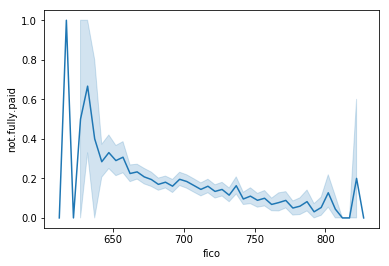

In [140]:
#sns.lineplot(dfloanborrower['int.rate'], dfloanborrower['not.fully.paid'])
sns.lineplot(dfloanborrower['fico'], dfloanborrower['not.fully.paid'])

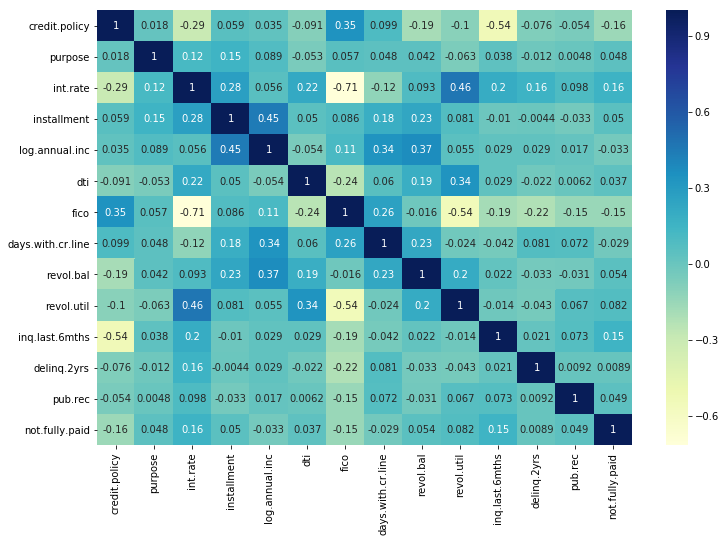

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(dfloanborrower.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split 

In [123]:
X = dfloanborrower.drop(['not.fully.paid','delinq.2yrs','days.with.cr.line'], axis=1)
y = dfloanborrower['not.fully.paid']

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [127]:
logReg = LogisticRegression(random_state=5)

In [128]:
logReg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [129]:
lenRegPrediction = logReg.predict(X_test)

In [130]:
accuracy_score(y_test,lenRegPrediction)

0.844258872651357

In [131]:
dfaccuracy = pd.DataFrame({"Actual":y_test,"Prediction":lenRegPrediction})

In [132]:
dfaccuracy.sample(10)

,Actual,Prediction
5466,0,0
9450,0,0
3484,0,0
3691,0,0
3742,0,0
6913,0,0
2096,0,0
6205,0,0
339,0,0
5724,0,0
